# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
from pprint import pprint 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)#10)#1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)#10)#1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
# pprint(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
units="Imperial"
url="https://api.openweathermap.org/data/2.5/weather?"
query_url=f"{url}appid={weather_api_key}&q={city}&units={units}"
# weather_response=requests.get(query_url)
# weather_json=weather_response.json()
# weather_json
     
print("Beginning Data Retrieval ")
print("--------------------------------")
record=0
set_count=1

## Loop through all the cities in our list
city_name=[]
Latitude=[]
Longitute=[]
maxTemperature=[]
Humidity=[]
Cloudiness=[]
Windspeed=[]
Country=[]
Date=[]

for i, city in enumerate(cities):
    # #Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record= 0
    record+=1
    query_url=f"{url}appid={weather_api_key}&q={city}&units={units}"
#     weather_response=requests.get(query_url)
#     weather_json=weather_response.json()
    try:
        weather_response=requests.get(query_url)
        weather_json=weather_response.json()
# #         city_name.append(weather_json["name"])
        Latitude.append(weather_json["coord"]["lat"])
        Longitute.append(weather_json["coord"]["lon"])
        maxTemperature.append(weather_json["main"]["temp_max"])
        Humidity.append(weather_json["main"]["humidity"])
        Cloudiness.append(weather_json['clouds']['all'])
        Windspeed.append(weather_json["wind"]["speed"])
        Country.append(weather_json["sys"]["country"])
        Date.append(weather_json["dt"])
        city_name.append(city)
        
        print(f'Processing Record {record} of Set {set_count} | {city}')
        
    except:
        print("City not found. Skipping...")
        pass

print("-----------------------------")
print("Data Retrieval Complete ")     
print("-----------------------------")


Beginning Data Retrieval 
--------------------------------
Processing Record 1 of Set 1 | rivers
Processing Record 2 of Set 1 | mar del plata
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | pringsewu
Processing Record 5 of Set 1 | port alfred
Processing Record 6 of Set 1 | auki
Processing Record 7 of Set 1 | mataura
Processing Record 8 of Set 1 | bismarck
City not found. Skipping...
Processing Record 10 of Set 1 | pryazha
Processing Record 11 of Set 1 | bluff
Processing Record 12 of Set 1 | lopukhiv
Processing Record 13 of Set 1 | leiva
Processing Record 14 of Set 1 | dikson
Processing Record 15 of Set 1 | trapani
Processing Record 16 of Set 1 | hilo
Processing Record 17 of Set 1 | bethel
Processing Record 18 of Set 1 | huambo
Processing Record 19 of Set 1 | waipawa
Processing Record 20 of Set 1 | hithadhoo
Processing Record 21 of Set 1 | turayf
Processing Record 22 of Set 1 | rikitea
Processing Record 23 of Set 1 | noumea
Processing Record 24 of Set 1 | bambous v

Processing Record 7 of Set 5 | marienburg
Processing Record 8 of Set 5 | qianjiang
City not found. Skipping...
Processing Record 10 of Set 5 | kawalu
Processing Record 11 of Set 5 | leh
Processing Record 12 of Set 5 | japura
Processing Record 13 of Set 5 | geraldton
Processing Record 14 of Set 5 | castro
Processing Record 15 of Set 5 | ponta do sol
City not found. Skipping...
Processing Record 17 of Set 5 | pitsunda
Processing Record 18 of Set 5 | charters towers
City not found. Skipping...
Processing Record 20 of Set 5 | umm lajj
City not found. Skipping...
Processing Record 22 of Set 5 | grevena
Processing Record 23 of Set 5 | voiron
Processing Record 24 of Set 5 | mount isa
Processing Record 25 of Set 5 | guatire
Processing Record 26 of Set 5 | kota kinabalu
Processing Record 27 of Set 5 | schruns
Processing Record 28 of Set 5 | kamenka
Processing Record 29 of Set 5 | srednekolymsk
Processing Record 30 of Set 5 | port elizabeth
Processing Record 31 of Set 5 | morondava
City not foun

Processing Record 13 of Set 9 | carmo do paranaiba
Processing Record 14 of Set 9 | rio grande
Processing Record 15 of Set 9 | zyryanskoye
City not found. Skipping...
Processing Record 17 of Set 9 | awbari
Processing Record 18 of Set 9 | nongstoin
Processing Record 19 of Set 9 | aklavik
Processing Record 20 of Set 9 | dukhovshchina
Processing Record 21 of Set 9 | fairbanks
Processing Record 22 of Set 9 | brae
Processing Record 23 of Set 9 | menongue
Processing Record 24 of Set 9 | ponta delgada
Processing Record 25 of Set 9 | hokitika
Processing Record 26 of Set 9 | prospect
Processing Record 27 of Set 9 | san carlos del zulia
Processing Record 28 of Set 9 | lagoa
Processing Record 29 of Set 9 | portland
Processing Record 30 of Set 9 | kirakira
Processing Record 31 of Set 9 | rasht
Processing Record 32 of Set 9 | rumuruti
City not found. Skipping...
Processing Record 34 of Set 9 | port blair
Processing Record 35 of Set 9 | taybad
City not found. Skipping...
Processing Record 37 of Set 9

Processing Record 15 of Set 13 | kisangani
Processing Record 16 of Set 13 | mugur-aksy
Processing Record 17 of Set 13 | abay
Processing Record 18 of Set 13 | yangambi
Processing Record 19 of Set 13 | malayal
Processing Record 20 of Set 13 | maningrida
Processing Record 21 of Set 13 | vilhena
City not found. Skipping...
-----------------------------
Data Retrieval Complete 
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df=pd.DataFrame({"City":city_name,
                         "Lat":Latitude,
                         "Lng":Longitute,
                         "Max Temp":maxTemperature,
                        "Humidity":Humidity,
                        "Cloudiness":Cloudiness,
                         "Wind Speed":Windspeed,
                         "Country":Country,
                         "Date":Date})
#                    
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rivers,50.0308,-100.2403,23.95,83,39,7.29,CA,1650905698
1,mar del plata,-38.0023,-57.5575,66.22,68,0,13.00,AR,1650905477
2,ushuaia,-54.8000,-68.3000,40.66,87,100,19.57,AR,1650905698
3,pringsewu,-5.3582,104.9744,74.46,97,75,3.02,ID,1650905699
4,port alfred,-33.5906,26.8910,60.19,81,50,4.00,ZA,1650905653


In [6]:
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.000000,567.000000,567.000000,567.000000,567.000000,567.000000,5.670000e+02
mean,18.845565,23.195243,63.025132,68.604938,59.356261,7.655750,1.650906e+09
std,32.957107,88.659112,22.226945,23.318865,37.660001,5.387226,1.075877e+02
min,-54.800000,-179.166700,-8.460000,1.000000,0.000000,0.000000,1.650905e+09
25%,-8.847100,-52.815700,50.340000,57.000000,21.000000,3.680000,1.650906e+09
50%,21.545300,25.200000,67.840000,73.000000,73.000000,6.130000,1.650906e+09
75%,47.119800,102.425000,79.485000,87.000000,98.000000,10.360000,1.650906e+09
max,78.218600,179.316700,105.980000,100.000000,100.000000,33.380000,1.650906e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
Humi_count_df=city_df.loc[city_df["Humidity"]>100]
len(Humi_count_df)

0

In [8]:
#  Get the indices of cities that have humidity over 100%.
Humi_count_df.index

Int64Index([], dtype='int64')

In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=city_df.drop(Humi_count_df.index,inplace=False)
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rivers,50.0308,-100.2403,23.95,83,39,7.29,CA,1650905698
1,mar del plata,-38.0023,-57.5575,66.22,68,0,13.00,AR,1650905477
2,ushuaia,-54.8000,-68.3000,40.66,87,100,19.57,AR,1650905698
3,pringsewu,-5.3582,104.9744,74.46,97,75,3.02,ID,1650905699
4,port alfred,-33.5906,26.8910,60.19,81,50,4.00,ZA,1650905653
...,...,...,...,...,...,...,...,...,...
562,abay,49.6311,72.8539,30.58,35,6,6.22,KZ,1650905976
563,yangambi,0.8102,24.4336,73.99,79,78,1.79,CD,1650905976
564,malayal,7.2080,121.9420,80.42,85,87,1.79,PH,1650905977
565,maningrida,-12.0667,134.2667,77.68,81,29,3.27,AU,1650905977


In [10]:
#Output
clean_city_data.to_csv("../output_data/cities.csv", index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
# Extract relevant fields from the data frame
lat = clean_city_data["Lat"]
max_temp = clean_city_data["Max Temp"]
humidity = clean_city_data["Humidity"]
cloud = clean_city_data["Cloudiness"]
wind_speed = clean_city_data["Wind Speed"]

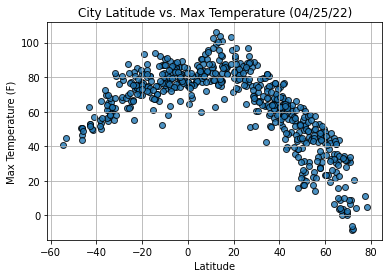

In [12]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lat, 
            max_temp,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

### Observation 1
From the scatter plot above, the city latitude is correlated with the max temperature. The cities that are closer to the 
equator line tend to have higher max temperature. Similarily, the cities that are farther away from the equator line tend 
to have lower max temperature.

## Latitude vs. Humidity Plot

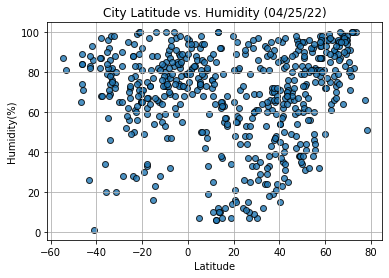

In [13]:
# Build scatter plot for latitude vs.humidity
plt.scatter(lat, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.ylabel("Humidity(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/Fig2.png")
# Show plot
plt.show()

### Observation 2
From the scatter plot above, there is no significant correlation between city latitude and humidity.

## Latitude vs. Cloudiness Plot

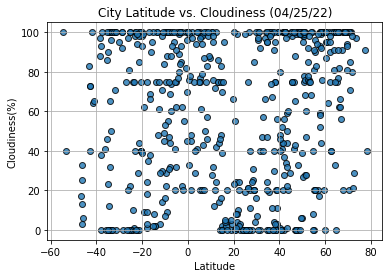

In [14]:
# Build scatter plot for latitude vs.cloudiness
plt.scatter(lat, 
            cloud,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.ylabel("Cloudiness(%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("../output_data/Fig3.png")
# Show plot
plt.show()

### Observation 3
From the scatter plot above, there is no significant correlation between city latitude and cloudiness.

## Latitude vs. Wind Speed Plot

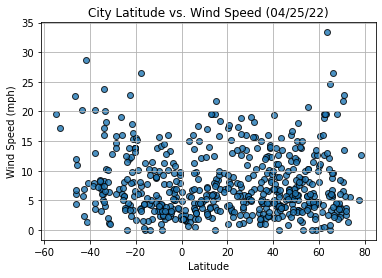

In [15]:
# Build scatter plot for latitude vs.wind speed
plt.scatter(lat, 
            wind_speed,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("../output_data/Fig4.png")
# Show plot
plt.show()

### Observation 4
From the scatter plot above, there is no significant correlation between city latitude and wind speed.

## Linear Regression

In [16]:
def plot_linear_regression(x_values, y_values, ylabel, coordinates, fileName):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.title("Linear Regression(%s)"%time.strftime("%x"))
   
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.ylabel(ylabel)
    print(f"The correlation coefficient r value is {st.pearsonr(x_values,y_values)}")
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(fileName)
    plt.show()
    

In [17]:
north_hemi=clean_city_data[clean_city_data["Lat"]>=0]
north_hemi
south_hemi=clean_city_data[clean_city_data["Lat"]<0]
south_hemi

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,mar del plata,-38.0023,-57.5575,66.22,68,0,13.00,AR,1650905477
2,ushuaia,-54.8000,-68.3000,40.66,87,100,19.57,AR,1650905698
3,pringsewu,-5.3582,104.9744,74.46,97,75,3.02,ID,1650905699
4,port alfred,-33.5906,26.8910,60.19,81,50,4.00,ZA,1650905653
5,auki,-8.7676,160.7034,77.40,89,55,3.24,SB,1650905699
...,...,...,...,...,...,...,...,...,...
555,vanimo,-2.6741,141.3028,78.03,89,100,5.03,PG,1650905973
556,mahanoro,-19.9000,48.8000,72.84,81,39,1.66,MG,1650905713
557,mbuguni,-3.5667,36.9500,80.22,64,100,5.30,TZ,1650905974
565,maningrida,-12.0667,134.2667,77.68,81,29,3.27,AU,1650905977


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient r value is (-0.8595318331351944, 6.0232938523331185e-112)
The r-squared is: 0.7387949721727477


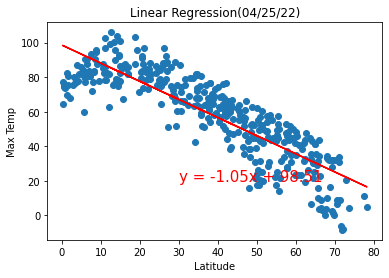

In [18]:

x_values=north_hemi["Lat"]
y_values=north_hemi["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(30,20),"../output_data/Fig5.png")

# save
# plt.savefig("../output_data/Fig5.png")

### Observation 5
From the scatter plot above, there is significantly negative correlation between city latitude and max temp. In the northern hemispher, the latitude is farther away the equator line, and the max temp tends to be lower.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient r value is (0.7546203100826683, 7.098490037030332e-36)
The r-squared is: 0.5694518123892628


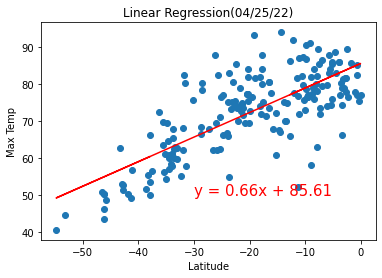

In [19]:
x_values=south_hemi["Lat"]
y_values=south_hemi["Max Temp"]
plot_linear_regression(x_values, y_values, 'Max Temp',(-30,50),"../output_data/Fig6.png")
# plt.savefig("../output_data/Fig6.png")

### Observation 6
From the scatter plot above, there is significantly positive correlation between city latitude and max temp. 
In the southern hemispher, the latitude is closer the equator line, and the max temp tends to be higher.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient r value is (0.27943951542060774, 3.1527035547239303e-08)
The r-squared is: 0.07808644277850413


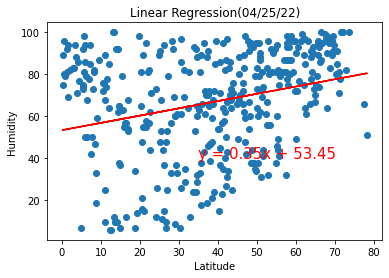

In [20]:
x_values=north_hemi["Lat"]
y_values=north_hemi["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(35,40),"../output_data/Fig7.png")
# plt.savefig("../output_data/Fig7.png")

### Observation 7
From the scatter plot above, there is no significantly correlation between city latitude and humidity 
in the northern hemispher. The r-squared value indicates the model is not efficient to explain the relationship between
latitude and humidity.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient r value is (0.062390663162651065, 0.3950019509073437)
The r-squared is: 0.003892594849875382


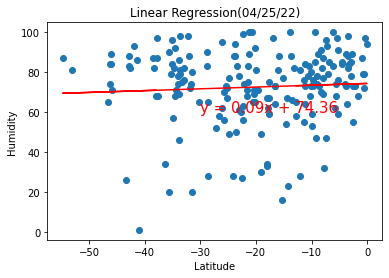

In [21]:
x_values=south_hemi["Lat"]
y_values=south_hemi["Humidity"]
plot_linear_regression(x_values, y_values, "Humidity",(-30,60),"../output_data/Fig8.png")
# plt.savefig("../output_data/Fig8.png")

### Observation 8
From the scatter plot above, there is no significantly correlation between city latitude and humidity 
in the southern hemispher. 
The r-squared value indicates the model is not efficient to explain the relationship between latitude and humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient r value is (0.23905619302458456, 2.514200511798741e-06)
The r-squared is: 0.057147863423407455


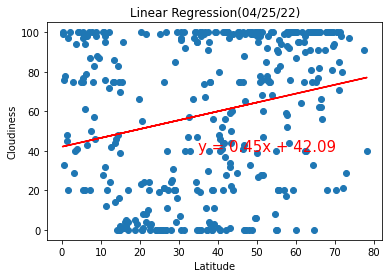

In [22]:
x_values=north_hemi["Lat"]
y_values=north_hemi["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(35,40),"../output_data/Fig9.png")
# plt.savefig("../output_data/Fig9.png")

### Observation 9
From the scatter plot above, there is no significantly correlation between city latitude and cloudiness
in the northern hemispher. 
The r-squared value indicates the model is not efficient to explain the relationship between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient r value is (0.16754664780079634, 0.02154854679011372)
The r-squared is: 0.028071879189284055


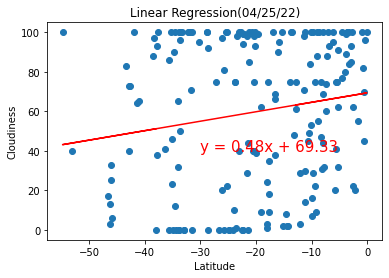

In [23]:
x_values=south_hemi["Lat"]
y_values=south_hemi["Cloudiness"]
plot_linear_regression(x_values, y_values, "Cloudiness",(-30,40),"../output_data/Fig10.png")
# plt.savefig("../output_data/Fig10.png")

### Observation 10
From the scatter plot above, there is no significantly correlation between city latitude and cloudiness in the southern hemispher. 
The r-squared value indicates the model is not efficient to explain the relationship between latitude and cloudiness.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient r value is (0.059491670424604806, 0.24793602133400147)
The r-squared is: 0.003539258849909794


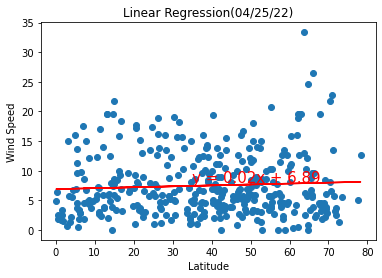

In [24]:
x_values=north_hemi["Lat"]
y_values=north_hemi["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(35,8),"../output_data/Fig11.png")
# plt.savefig("../output_data/Fig11.png")

### Observation 11
From the scatter plot above, there is no significantly correlation between city latitude and wind speed 
in the northern hemispher. 
The r-squared value indicates the model is not efficient to explain the relationship between latitude and wind speed.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient r value is (-0.29622148834702466, 3.6670431601910474e-05)
The r-squared is: 0.08774717015852634


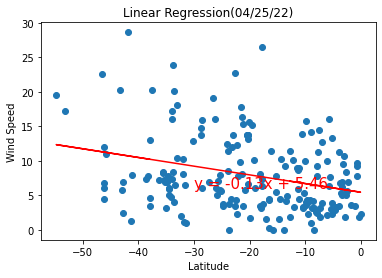

In [25]:
x_values=south_hemi["Lat"]
y_values=south_hemi["Wind Speed"]
plot_linear_regression(x_values, y_values, "Wind Speed",(-30,6),"../output_data/Fig12.png")
# plt.savefig("../output_data/Fig12.png")

### Observation 12
From the scatter plot above, there is negative correlation between city latitude and wind speed in the southern hemispher. 
But the r-squared value indicates that latitude might not be a significant factor that causes wind speed.